# Differential Evolution

**Equations and pseudo code is taken from "Learning Algorithms and Neural Networks" notes written by Dr. Victor Parque.**

## Basic Differential Evolution Algorithm

For a population of $NP$ vectors $x_i$, each in $\mathbb{R}^D$, three randomly sampled vectors $x_{r1}$, $x_{r2}$ and $x_{r3}$, a mutant individual $v_t$ is calculated as follows:
$$
v = x_{r1} + F(x_{r2} - x_{r3})
$$
where $F$ is a scaling factor $\in [0, 1]$.

Then, a mutation vector $u$ is caluclated by randomly mutating random entries in $v$ as follows:

$$
e_{j} = 0\ if\ Rand \leq CR \ or\ j = Rand;\ 0\ otherwise
$$
$$
e = [e_1, e_2, \dots , e_D]
$$

Then

$$
u_t = x_i + e \dot (v - x_i)
$$

Finally,

$$
x_i^{new} = u \ if \ f(u) < f(x_i) \ ;\ 0\ otherwise.
$$

Algorithm Pseudo code:

```python
Generate initial population
Repeat:
    for each individual in population:
        randomly select x_r1, x_r2, x_r3 from the population
        Compute mutant v
        Compute trial u
        if f(u) < f(x):
            x = u
        
Until termination criteria ends
```

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
def f(x):
    return (4 - 2.1*x[:,0]**2+x[:,0]**4/3) * x[:,0]**2 + np.prod(x, axis=1) + \
            (-4+4*x[:,1]**2)*x[:,1]**2

In [3]:
NP = 100
D = 2
F = 0.9
CR = 0.2
lb = [-5] * D
ub = [5] * D
pop = np.random.uniform(lb, ub, size=(NP, D))

C:\Users\osama\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  
C:\Users\osama\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
  


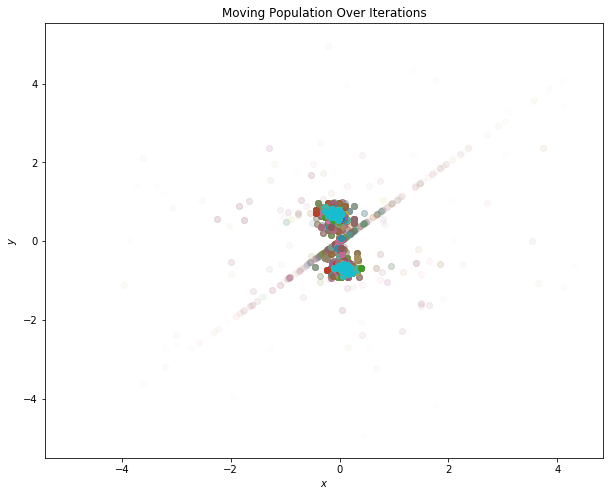

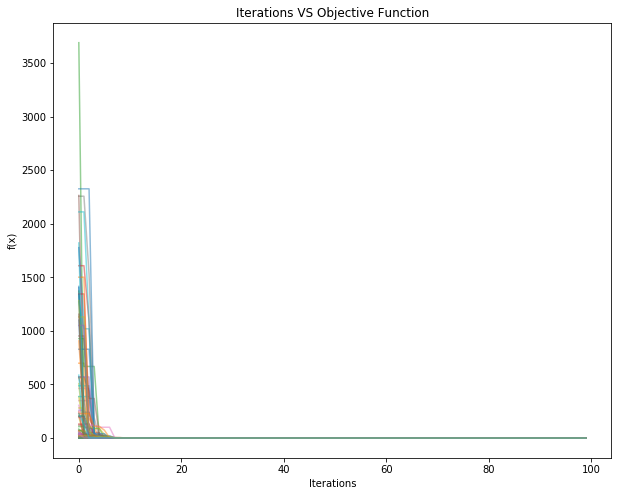

In [4]:
iterations = 100
history = np.zeros((NP, iterations))
plt.figure(figsize=(10,8))
for _ in range(iterations):
    for i, x in enumerate(pop):
        x1, x2, x3 = np.random.choice(np.delete(pop, x), replace=False, size=3)
        v = x1 + F*(x2 - x3)
        e = np.array([1 if np.random.rand() >= CR else 0 for _ in range(D)])
        u = x + e * (v - x)
        if f(u[None,:]) < f(x[None,:]):
            pop[i] = u
    history[:,_] = f(pop)
    plt.scatter(pop[:,0], pop[:,1], alpha=_/iterations)
plt.title('Moving Population Over Iterations')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

plt.figure(figsize=(10,8))
plt.title('Iterations VS Objective Function')
plt.xlabel('Iterations')
plt.ylabel('f(x)')
[plt.plot(range(iterations), history[i,:], alpha=0.5) for i in range(NP)]
plt.show()

In [8]:
def f2(x):
    return 10 + \
    np.exp(1) - \
    10*np.exp(-0.2 * np.sqrt(0.5 * (x[:,0]**2 + x[:,1]**2)) - \
    np.exp(0.5*(np.cos(2*np.pi*x[:,0])+np.cos(2*np.pi*x[:,1]))))

In [6]:
NP = 100
D = 2
F = 0.9
CR = 0.2
lb = [-5] * D
ub = [5] * D
pop = np.random.uniform(lb, ub, size=(NP, D))

C:\Users\osama\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  
C:\Users\osama\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
  


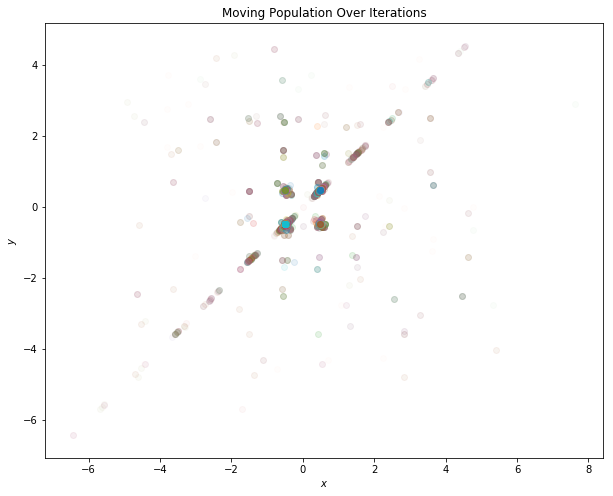

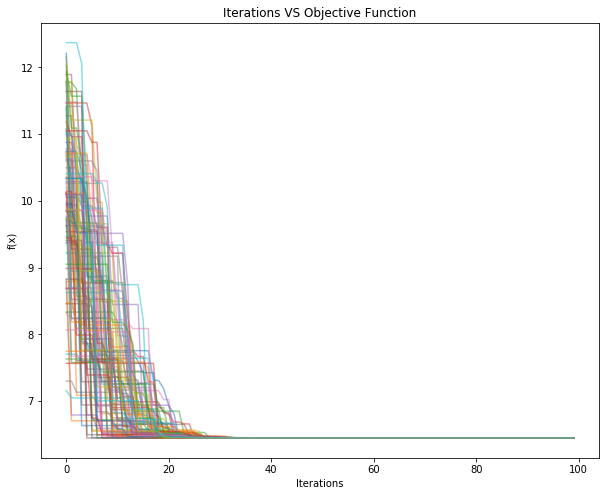

In [7]:
iterations = 100
history = np.zeros((NP, iterations))
plt.figure(figsize=(10,8))
for _ in range(iterations):
    for i, x in enumerate(pop):
        x1, x2, x3 = np.random.choice(np.delete(pop, x), replace=False, size=3)
        v = x1 + F*(x2 - x3)
        e = np.array([1 if np.random.rand() >= CR else 0 for _ in range(D)])
        u = x + e * (v - x)
        if f2(u[None,:]) < f2(x[None,:]):
            pop[i] = u
    history[:,_] = f2(pop)
    plt.scatter(pop[:,0], pop[:,1], alpha=_/iterations)
plt.title('Moving Population Over Iterations')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

plt.figure(figsize=(10,8))
plt.title('Iterations VS Objective Function')
plt.xlabel('Iterations')
plt.ylabel('f(x)')
[plt.plot(range(iterations), history[i,:], alpha=0.5) for i in range(NP)]
plt.show()

## JADE

### Mutation Strategy

$$v_i = x_i + F_{x_i} (x_{best}^p - x_{i}) + F_{x_i} (x_{r1} - \hat{x} )$$
where
* $F_{x_i}$ is the scaling factor associated with vector $x_i$.
* $x_{best}^p$ is any random individual from the $p*100\%$ best of the population.
* $p$ is a user-defined parameters $\in (0,1]$
* $\hat{x}$ is a randomly selected individual from the union of P and A (P is population, A is an archieve).

Algorithm Pseudo Code:
```python
Generate initial population P and sets A, S_F and S_CR
mu_F = mu_CR = 0.5
sigma = 0.1

Repeat:
    for each individual x_i in population P:
        Compute F_x_i and CR_x_i
        Randomly select x_best_p from the best p*100% of P
        Randomly select x_1 from population
        Randomly select x_hat_i from P union A
        
        Compute mutant v_i
        Compute trial u_i
        if f(u_i) < f(x_i):
            x_i = u_i
            Add x_i to A
            Add CR_x_i to S_CR
            Add F_x_i to S_F
        
        Remove individuals from A randomly if |A| < |P|
        Re-compute mu_F and mu_CR
Until termination criteria ends

```

In [76]:
# Generating population
NP = 100
D = 2
lb = [-5] * D
ub = [5] * D
p = 0.1
pop = np.random.uniform(lb, ub, size=(NP, D))
A = []
S_F = []
S_CR = []
c = 0.1

mu_F = mu_CR = 0.5
std_F = std_CR = 0.1

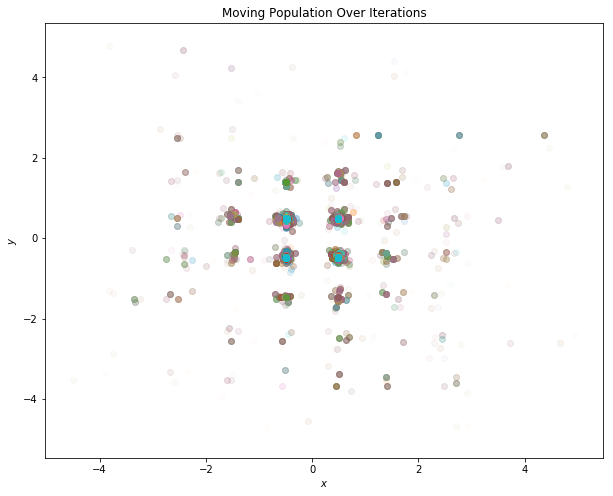

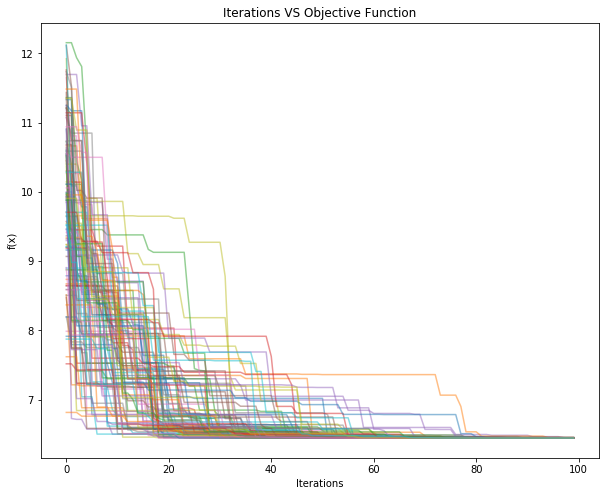

In [77]:
iterations = 100

# plotting variables
history = np.zeros((NP, iterations))
plt.figure(figsize=(10,8))



for _ in range(iterations):
    
    F  = np.empty(NP)
    CR = np.empty(NP)

    
    for i, x in enumerate(pop):
        
        # computing Fx and CRx
        F[i] = np.random.normal(loc=mu_F, scale=std_F, size=1)
        CR[i] = np.random.normal(loc=mu_CR, scale=std_CR, size=1)
        
        # generating random individuals for mutation
        x_best_p = pop[np.random.choice(np.argsort(f2(pop))[:int(p*NP)], size=1)]
        x1 = pop[np.random.choice(range(NP), size=1)]
        P_A = np.append(pop, np.array(A), axis=0) if len(A) > 0 else pop
        x_hat = P_A[np.random.choice(range(P_A.shape[0]), size=1)]
        
        # mutation
        v = x + F[i]*(x_best_p - x) + F[i]*(x1 - x_hat)
        
        # cross-over
        e = np.uint8(np.random.rand(D) < CR[i])
#         print('e shape:', e.shape)
        
        u = x + e * (v - x)
#         print(u, x)
        

        # selection
        if f2(u) <= f2(x[None,:]):
#             print('selection happened')
            A.append(x)
            pop[i] = u[0]
            S_F.append(F[i])
            S_CR.append(CR[i])
        
        if len(A) > pop.shape[0]:
            A.pop(np.random.randint(len(A)))
        
        # Recomuting mu_F and mu_CR. mu_F uses Lehmer's mean
        mu_CR = (1-c) * mu_CR + c * np.mean(np.array(S_CR))
        mu_F = (1-c) * mu_F + c * (np.sum(np.array(S_F)**2) / sum(S_F))
    history[:,_] = f2(pop)
    plt.scatter(pop[:,0], pop[:,1], alpha=_/iterations)
plt.title('Moving Population Over Iterations')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

plt.figure(figsize=(10,8))
plt.title('Iterations VS Objective Function')
plt.xlabel('Iterations')
plt.ylabel('f(x)')
[plt.plot(range(iterations), history[i,:], alpha=0.5) for i in range(NP)]
plt.show()

## RBDE

The three individuals $x_t^1$, $x_t^2$ and $x_t^3$ are selected based on the Whitely probability distribution. The index $j$ of an individual $x_t^j$ is sampled using the following formula:

$$ j = \left \lfloor \frac{|P|}{2(\beta - 1)}(\beta - \sqrt{\beta^2 - 4(\beta - 1)r}\right \rfloor $$

* $|P|$ : the size of the population
* $\beta$: bias term $\in (1,2]$
* $r$: random number $\in U[0,1]$

In [ ]:
# Generating population
NP = 100
D = 2
lb = [-5] * D
ub = [5] * D
pop = np.random.uniform(lb, ub, size=(NP, D))
